# Cluster Evaluation

## How many clusters do I use?

### Performance of clusters

Imagine I had used 
- 1 cluster.

In [57]:
X = X_std.copy()

In [59]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,0


In [58]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [69]:
kmeans = KMeans(1)

kmeans.fit(X)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [70]:
len(X)

50

In [72]:
kmeans.inertia_

200.0

- 2 clusters

In [73]:
kmeans = KMeans(2)

kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [74]:
kmeans.inertia_

104.96163315756871

# Inertia (Distortion):  

## Definition: mean sum of squared distances to centers

In [75]:
for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    print(kmeans.inertia_)
    

200.0
104.96163315756871
80.08569526137276
57.55425863091105
50.071170568930896
44.195451280860624
41.73909877629872
36.541045078547725
32.80847863981355


In [83]:
inertia = []
for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    print(kmeans.inertia_)
    inertia.append(kmeans.inertia_)

200.0
104.96163315756871
80.08569526137276
57.55425863091105
50.333273851849064
45.48457611952801
40.04193172475098
35.117481871789806
31.771893005291567


# The Elbow Method (COTOVELO)

Text(0, 0.5, 'Inertia (Distortion)')

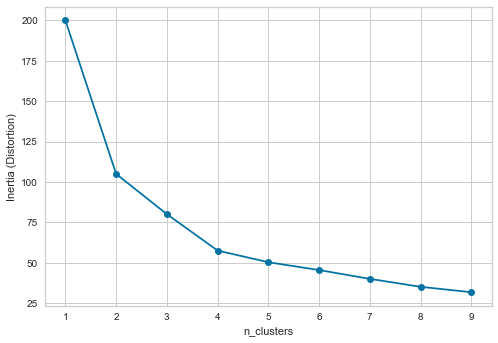

In [84]:
plt.plot(range(1,10), inertia, '-o')
plt.xlabel('n_clusters')
plt.ylabel('Inertia (Distortion)')

In [48]:
kmeans.inertia_

31.64723878920327

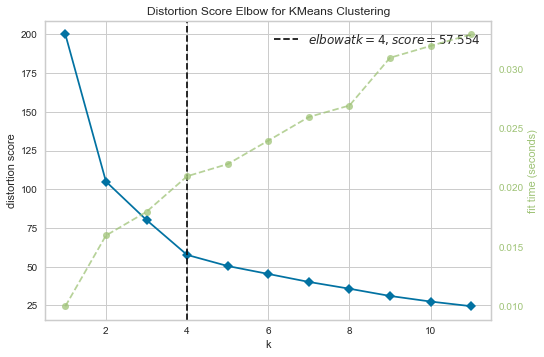

In [85]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Silhouette


The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters.

The silhouette ranges from −1 to +1


In [86]:
from yellowbrick.cluster import SilhouetteVisualizer

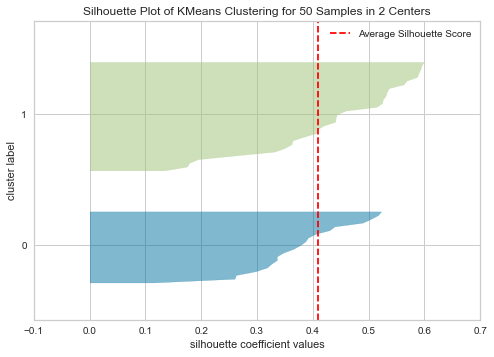

In [93]:
model = KMeans(2).fit(X)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [87]:
model = KMeans(4).fit(X)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

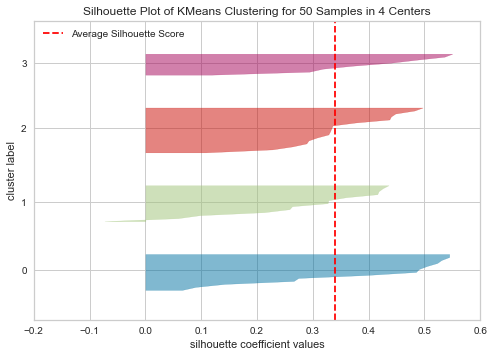

In [88]:

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

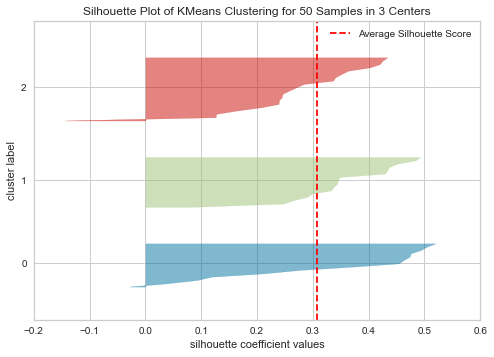

In [92]:
model = KMeans(3).fit(X)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

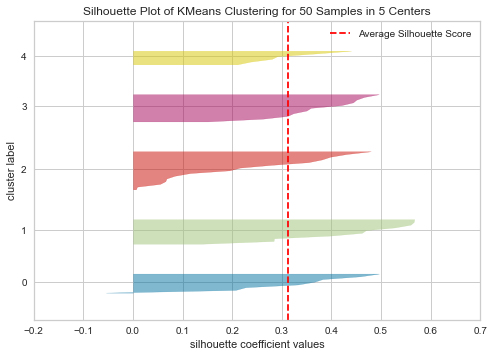

In [101]:
model = KMeans(5).fit(X)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [102]:
kmeans = KMeans(4)
kmeans.fit(X_std)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

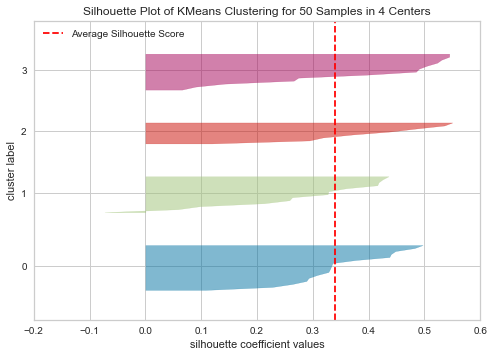

In [106]:
model = KMeans(4).fit(X)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

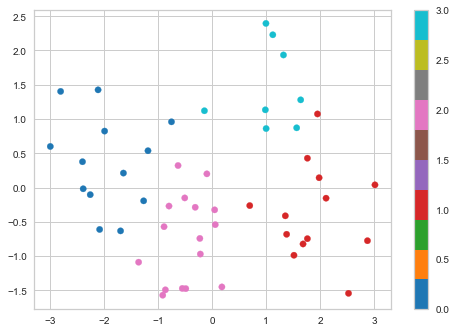

In [104]:
plt.scatter(components[:, 0], 
            components[:, 1], 
            s=40, c=kmeans.labels_, cmap='tab10');
plt.colorbar();

In [112]:
def plot_circle_regions(X, k, xlim=(-4,4), ylim=(-4, 4), cmap='tab10'):

    from scipy.spatial.distance import cdist
    kmeans = KMeans(k).fit(X)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[kmeans.labels_ == i], [center]).max() for i, center in enumerate(centers)]

    fig, ax = plt.subplots(figsize=(12,8))

    ax.scatter(X[:, 0], X[:, 1], s=40, c=kmeans.labels_, cmap=cmap);

    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='b', lw=3, alpha=0.3, zorder=1))

    #ax.set_xlim(xlim)
    #ax.set_ylim(ylim)
    plt.gca().set_aspect('equal', adjustable='box')



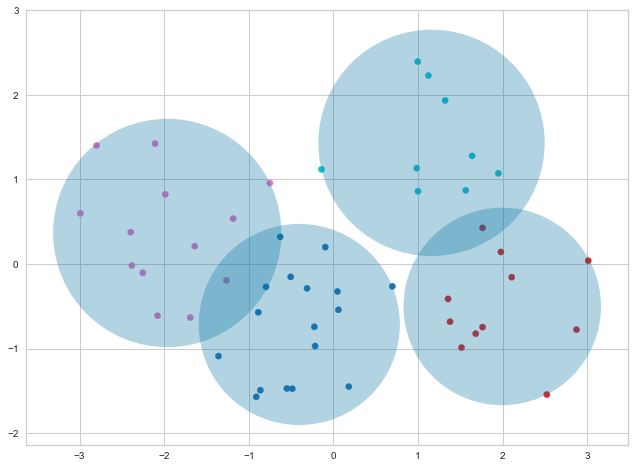

In [113]:
plot_circle_regions(components, 4, )

# Other Clustering Methods

## DBScan

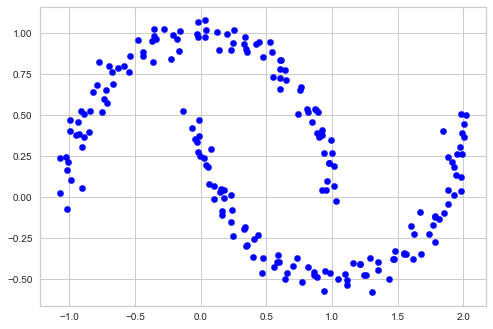

In [114]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=40, c='blue');

What do we expect the clusters to be?

# Let's use KMeans to predict the clusters

In [118]:
kmeans = KMeans(2, random_state=0)
kmeans.fit(X)

labels = KMeans(2, random_state=0).fit_predict(X)

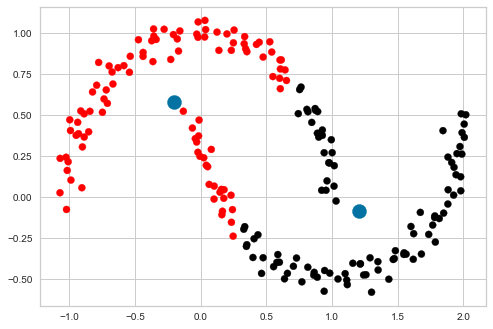

In [121]:
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='flag');
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200);


The KMeans algorithm 

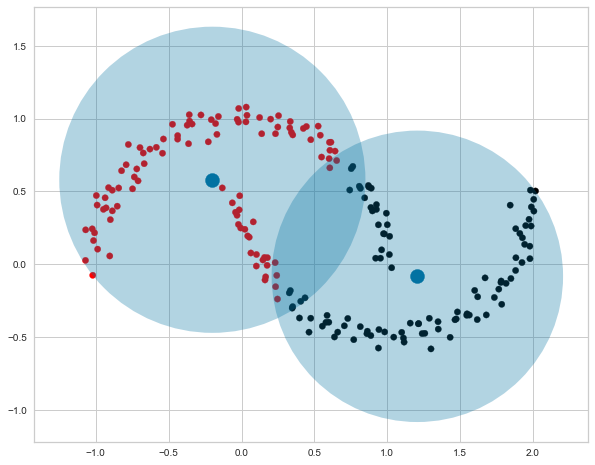

In [122]:
plot_circle_regions(X, 2, xlim=(-2,3), ylim=(-2,3), cmap='flag')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200);

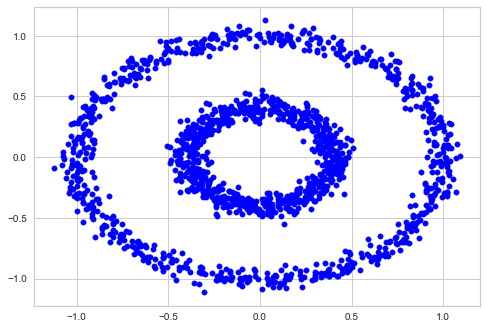

In [123]:
from sklearn.datasets import make_circles

X1, Y1 = make_circles(factor=0.4, noise=0.05, n_samples=1500)

plt.scatter(X1[:, 0], X1[:, 1], s=30, c='blue');

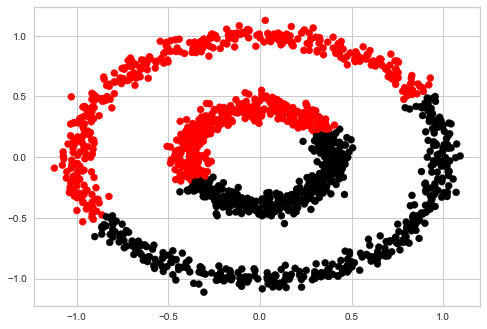

In [124]:
labels = KMeans(2, random_state=0).fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels,s=50, cmap='flag');

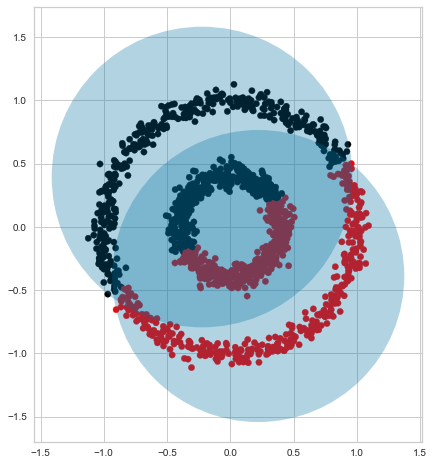

In [125]:
plot_circle_regions(X1, 2, xlim=(-2,2), ylim=(-2,2), cmap='flag')

## DBScan comes to help

A Density based algorithm can be used to start from a random point and `walk` throughout its neighborhood

It basically requires the understanding of 2 parameters:
    1. eps: the mini-radius it will use to look for neighbors.
    2. min_samples: how many points is it needed for it to consider 1 cluster.

**Important Note:**

The DBScan algorithm will **try** to find clusters. If it looks at a neighborhood of a point and doesn't find anyone within range, it will consider it at cluster **-1**, which means **noise** cluster.

In [126]:
from sklearn.cluster import DBSCAN

In [127]:
db = DBSCAN(eps=0.3, min_samples=10)

In [128]:
db.fit(X1)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [129]:
labels = db.fit_predict(X1)

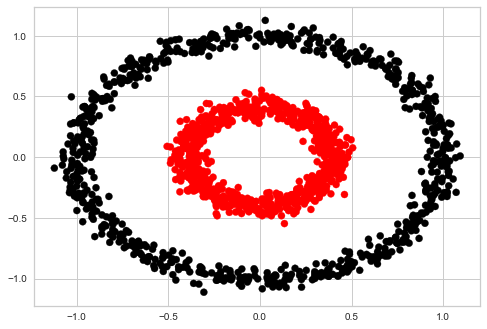

In [131]:
plt.scatter(X1[:, 0], X1[:, 1], c=labels,s=50, cmap='flag');

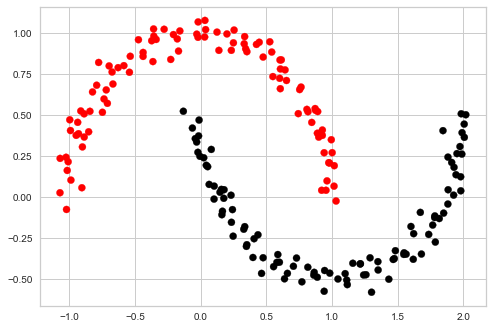

In [132]:
X, y = make_moons(200, noise=.05, random_state=0)

labels = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='flag');

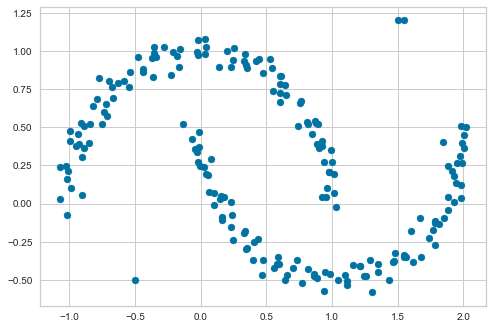

In [156]:
X[199, :] = (1.5, 1.2)
X[198, :] = (1.55, 1.2)
X[197, :] = (-0.5, -0.5)
plt.scatter(X[:, 0], X[:, 1]);

In [157]:
labels

array([ 0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        1,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,
        1,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,
        1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,
        0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1, -1, -1], dtype=int64)

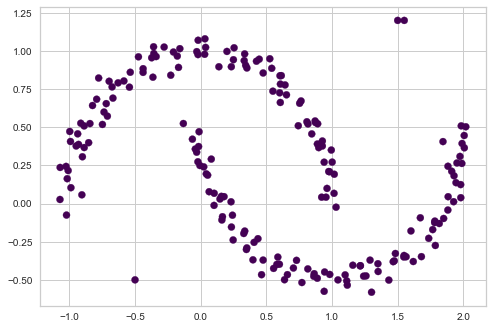

In [166]:
labels = DBSCAN(eps=1, min_samples=10).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

In [167]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [159]:
labels

array([ 0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        1,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,
        1,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,
        1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,
        0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  1, -1, -1, -1], dtype=int64)